# LevFactor

## 1. Obtain Macro Data（FRED）from TimeMachine


In [164]:
import pandas as pd
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

In [165]:
fred_data = pd.read_csv("datasets/ltab129d.csv", sep=" ", index_col=0)
print(fred_data.index[0], '-', fred_data.index[-1])
fred_data = fred_data.loc[196404:200904]
fred_data.head(10)

195201 - 201003


,FL664090005.Q,FL663020003.Q,FL664004005.Q,FL663069103.Q,FL663061105.Q,FL663061703.Q,FL663062003.Q,FL663063005.Q,FL663069803.Q,FL663064003.Q,...,FL663168005.Q,FL663170003.Q,FL663167005.Q,FL663167003.Q,FL763067005.Q,FL663178003.Q,FL663190005.Q,FL663192003.Q,FL663194005.Q,FL663193005.Q
DATES,,,,,,,,,,,,,,,,,,,,,
196404,9862,681,2674,0,1374,0,693,607,0,897,...,0,350,11220,1785,9435,60,984,298,0,686
196501,9051,687,2104,0,955,0,750,399,0,688,...,0,360,10345,1747,8598,67,976,300,0,676
196502,10499,698,3132,0,1510,0,835,787,0,1077,...,0,360,11885,2041,9844,64,966,291,0,675
196503,8511,709,1721,0,595,0,754,372,0,661,...,0,370,9973,2284,7689,82,947,281,0,666
196504,10349,711,2449,0,1082,0,453,914,0,1203,...,0,370,11968,2691,9277,93,947,281,0,666
196601,9123,730,1605,0,909,0,333,363,0,651,...,0,380,10681,2958,7723,101,929,274,0,655
196602,10507,746,2303,0,818,0,618,867,0,1155,...,0,390,12138,2789,9349,84,928,281,0,647
196603,8930,764,1595,0,893,0,324,378,0,666,...,0,400,10365,2665,7700,92,925,288,0,637
196604,11286,784,3235,0,1742,0,465,1028,0,1317,...,0,410,12779,2905,9874,95,876,250,0,626


In [166]:
# === 关键步骤：转换索引格式 ===
# 你的格式是 YYYY0Q (如 195201 代表 1952Q1)
# 我们需要将其转换为 pandas 的 PeriodIndex (季度格式)

# 方法：将数字转字符串，拼接成 "1952Q1" 的标准格式
# 1. 取前4位年份
years = fred_data.index.astype(str).str[:4]
# 2. 取最后1位季度
quarters = fred_data.index.astype(str).str[-1]
# 3. 拼接并转换
new_index_str = years + 'Q' + quarters  # 结果如 "1952Q1"
fred_data.index = pd.PeriodIndex(new_index_str, freq='Q')
fred_data.head(5)

,FL664090005.Q,FL663020003.Q,FL664004005.Q,FL663069103.Q,FL663061105.Q,FL663061703.Q,FL663062003.Q,FL663063005.Q,FL663069803.Q,FL663064003.Q,...,FL663168005.Q,FL663170003.Q,FL663167005.Q,FL663167003.Q,FL763067005.Q,FL663178003.Q,FL663190005.Q,FL663192003.Q,FL663194005.Q,FL663193005.Q
DATES,,,,,,,,,,,,,,,,,,,,,
1964Q4,9862,681,2674,0,1374,0,693,607,0,897,...,0,350,11220,1785,9435,60,984,298,0,686
1965Q1,9051,687,2104,0,955,0,750,399,0,688,...,0,360,10345,1747,8598,67,976,300,0,676
1965Q2,10499,698,3132,0,1510,0,835,787,0,1077,...,0,360,11885,2041,9844,64,966,291,0,675
1965Q3,8511,709,1721,0,595,0,754,372,0,661,...,0,370,9973,2284,7689,82,947,281,0,666
1965Q4,10349,711,2449,0,1082,0,453,914,0,1203,...,0,370,11968,2691,9277,93,947,281,0,666


## 2. Constitute "Leverage Factor"

文章对 LevFac (Broker-Dealer Leverage Factor) 的构建非常具体，为了避免“前视偏差”（Look-ahead Bias），他们采用了一种 “实时扩张窗口去季节性”（Real-time Expanding-window Seasonal Adjustment） 的方法。

$$Leverage_t = \frac{Tot\_Asset_t}{Tot\_Asset_t - Tot\_Liabilities_t}$$

In [167]:
fred_data['tot_asset'] = fred_data['FL664090005.Q']
fred_data['tot_liabilities'] = fred_data['FL664190005.Q']

<Axes: xlabel='DATES'>

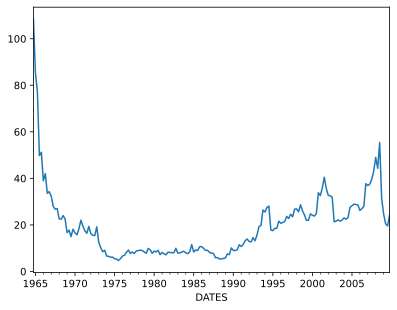

In [168]:
fred_data['Leverage'] = fred_data['tot_asset']/(fred_data['tot_asset'] - fred_data['tot_liabilities'])
fred_data['Leverage'].plot()

### Real-time Seasonal Adjustment

$$LogLev_t =  \text{Ln}(Leverage_t)$$

$$\Delta \ln(Leverage_t) = \ln(Leverage_t) - \ln(Leverage_{t-1})$$

文中提到，由于杠杆率具有高持久性（Persistence），直接使用对数变化量与使用 AR(1) 模型的残差（Innovations）几乎是一样的，为了简化，作者选择了对数变化量 。

普通的去季节性通常是对全样本跑一次回归，但这会用到未来的数据（Look-ahead bias）。文章采用了 “扩张窗口回归” (Expanding-window regression) 来模拟“实时”的数据环境。

具体算法逻辑：对于每一个时间点 $t$（从样本开始到结束）：
- 取数据子集：只使用从起始点到当前时间点 $t$ 的历史数据。
- 构建虚拟变量：设置 4 个季度虚拟变量（Q1, Q2, Q3, Q4）。
- 运行回归：将截止到 $t$ 时刻的 $\Delta \ln(Leverage)$ 对季度虚拟变量进行 OLS 回归。
$$\Delta \ln(Leverage_\tau) = \alpha + \sum_{j=1}^{3} \delta_j D_{j,\tau} + \epsilon_\tau \quad (\text{for } \tau = 1 \dots t)$$(注：通常使用 4 个 dummy 去掉截距，或者 3 个 dummy 加截距，效果一样)
- 获取冲击 (Shock)：当前时刻 $t$ 的残差 $\epsilon_t$ 就是该时刻的 LevFac。 $$LevFac_t = Actual_t - PredictedSeasonalComponent_t$$
- 扩张窗口：移动到 $t+1$ 时刻，重复上述步骤（样本变多了 1 个季度）。

In [153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def seasonal_adj_lev_fac(raw_leverage_series):
    print("--- 1. 检查输入数据 ---")
    print(f"原始数据长度: {len(raw_leverage_series)}")
    print(f"原始索引类型: {type(raw_leverage_series.index)}")
    print(raw_leverage_series.head())

    # 1. 确保是浮点数
    raw_leverage_series = raw_leverage_series.astype(float)

    # 2. 计算 Log Changes
    # 处理 Log 中的负数或零（杠杆率不能为负）

        
    log_lev = np.log(raw_leverage_series)
    d_log_lev = log_lev.diff().dropna()
    
    print(f"\n--- 2. 检查对数差分后数据 (y) ---")
    print(f"y 长度: {len(d_log_lev)}")
    print(d_log_lev.head())

    # 3. 构造季度 Dummies
    # 强制确保索引具备 .quarter 属性
    try:
        quarters = d_log_lev.index.quarter
    except AttributeError:
        print("\n❌ 错误：索引不是时间类型(Datetime/Period)，无法提取季度！")
        print("请先运行：df.index = pd.PeriodIndex(df.index, freq='Q')")
        return pd.Series([np.nan]*len(d_log_lev), index=d_log_lev.index)

    # 关键修复：astype(float)
    dummies = pd.get_dummies(quarters, prefix='Q').astype(float)

    # === 关键修复：强制对齐索引 ===
    # 直接把 dummy 的 index 覆盖为 y 的 index，确保绝对匹配
    dummies.index = d_log_lev.index
    
    # 添加截距
    # X = sm.add_constant(dummies)
    X = dummies
    
    print(f"\n--- 3. 检查自变量矩阵 (X) ---")
    print(X.head())

    # 4. 扩张窗口回归
    lev_shocks = []
    min_periods = 12  # 至少需要 12 个季度
    
    if len(d_log_lev) <= min_periods:
        print(f"\n❌ 错误：样本量 ({len(d_log_lev)}) 小于最小窗口 ({min_periods})")
        return pd.Series(np.nan, index=d_log_lev.index)
    

    print("\n--- 4. 开始循环回归 ---")
    error_count = 0
    
    # 使用 tqdm 显示进度（如果有的话），没有就普通循环
    # 这里的 range 确保了索引是对齐的
    indices = d_log_lev.index
    
    for i in range(min_periods, len(d_log_lev)):
        # 显式使用 iloc 切片，避免索引对齐问题
        curr_y = d_log_lev.iloc[:i+1]
        curr_X = X.iloc[:i+1]
        
        try:
            # 运行回归
            model = sm.OLS(curr_y, curr_X).fit()
            # 取最后一个残差
            lev_shocks.append(model.resid.iloc[-1])
            
        except Exception as e:
            if error_count < 3: # 只打印前3个错误
                print(f"回归在第 {i} 步失败: {e}")
            error_count += 1
            lev_shocks.append(np.nan)

    # 结果对齐
    # 结果的长度是 len(d_log_lev) - min_periods
    result_index = d_log_lev.index[min_periods:]
    lev_fac = pd.Series(lev_shocks, index=result_index)
    
    print(f"\n✅ 完成！生成因子长度: {len(lev_fac)}")
    print(f"非 NaN 数量: {lev_fac.notna().sum()}")
    print(lev_fac.head())
    
    return lev_fac, log_lev


In [154]:
lev_fac, log_lev = seasonal_adj_lev_fac(fred_data['Leverage'])

--- 1. 检查输入数据 ---
原始数据长度: 181
原始索引类型: <class 'pandas.core.indexes.period.PeriodIndex'>
DATES
1964Q4    108.373626
1965Q1     85.386792
1965Q2     77.198529
1965Q3     49.771930
1965Q4     51.232673
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 2. 检查对数差分后数据 (y) ---
y 长度: 180
DATES
1965Q1   -0.238393
1965Q2   -0.100811
1965Q3   -0.438929
1965Q4    0.028926
1966Q1   -0.273145
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 3. 检查自变量矩阵 (X) ---
        Q_1  Q_2  Q_3  Q_4
DATES                     
1965Q1  1.0  0.0  0.0  0.0
1965Q2  0.0  1.0  0.0  0.0
1965Q3  0.0  0.0  1.0  0.0
1965Q4  0.0  0.0  0.0  1.0
1966Q1  1.0  0.0  0.0  0.0

--- 4. 开始循环回归 ---

✅ 完成！生成因子长度: 168
非 NaN 数量: 168
DATES
1968Q1    0.010283
1968Q2    0.037533
1968Q3    0.226723
1968Q4   -0.063279
1969Q1   -0.088941
Freq: Q-DEC, dtype: float64


### No seasonla adjustement

In [169]:
log_lev = fred_data['Leverage'].apply(np.log)
lev_fac = fred_data['Leverage'].apply(np.log).diff()

### Standardization(Z-Score)
We standardize each series to have zero mean and unit variance for convenience.
$$ X = \frac{X-\mu}{\sigma}$$

In [170]:
def Zscore(factor):
    return (factor - factor.mean())/(factor.std())

In [171]:
ZLevFac = Zscore(lev_fac)
ZLogLev = Zscore(log_lev)

In [174]:
fred_data['LevFac'] = lev_fac
fred_data['LogLev'] = log_lev
fred_data['Z-LevFac'] = ZLevFac
fred_data['Z-LogLev'] = ZLogLev
fred_data = fred_data.dropna()
fred_data = fred_data.loc["1968Q1":]

In [187]:
fred_data['LevFac'].

DATES
1968Q1   -0.177376
1968Q2   -0.006216
1968Q3    0.066385
1968Q4   -0.064612
1969Q1   -0.298835
            ...   
2008Q4   -0.571085
2009Q1   -0.237074
2009Q2   -0.185244
2009Q3   -0.047110
2009Q4    0.217836
Freq: Q-DEC, Name: LevFac, Length: 168, dtype: float64

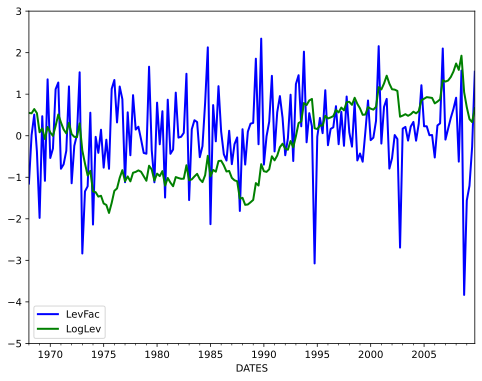

In [175]:
import matplotlib.pyplot as plt
ax = fred_data[['Z-LevFac', 'Z-LogLev']].plot(
    label=['LevFac', 'LogLev'], 
    color=['blue', 'green'],  # 在这里指定颜色
    figsize=(8, 6),               # 推荐：设置一下图片大小
    linewidth=2
)
plt.ylim(-5, 3)  # 设置纵坐标范围为 -5 到 3

# 显式显示图例

plt.legend(['LevFac', 'LogLev'], loc='lower left')
plt.grid(False)
plt.savefig('Fig2_Log-leverage and leverage factor.png')

## 3. New LevFac

### Old VS New LevFac
Comparison of the two leverage factors constructed from the two versions of the Flow of Funds
data.

In [176]:
df_new_40 = pd.read_csv("datasets/BOGZ1FL664090005Q.csv",index_col=0)
df_new_41 = pd.read_csv("datasets/BOGZ1FL664190005Q.csv",index_col=0)
df_new = pd.DataFrame()
df_new['tot_asset'] = df_new_40['BOGZ1FL664090005Q']
df_new['tot_liabilities'] = df_new_41['BOGZ1FL664190005Q']
df_new['Leverage'] = df_new['tot_asset']/(df_new['tot_asset'] - df_new['tot_liabilities'])
df_new = df_new.loc["1964":] #.loc[196404:200904]-04-01":"2009-04-01", ]
df_new.index = pd.to_datetime(df_new.index)
df_new.index = df_new.index.to_period('Q')
df_new.head(5)

,tot_asset,tot_liabilities,Leverage
observation_date,,,
1964Q1,8280.0,7932.0,23.793103
1964Q2,9303.0,8942.0,25.770083
1964Q3,9157.0,8783.0,24.483957
1964Q4,9862.0,9473.0,25.352185
1965Q1,9051.0,8645.0,22.293103


In [177]:
new_lev_fac, log_new_lev = seasonal_adj_lev_fac(df_new['Leverage'])

--- 1. 检查输入数据 ---
原始数据长度: 246
原始索引类型: <class 'pandas.core.indexes.period.PeriodIndex'>
observation_date
1964Q1    23.793103
1964Q2    25.770083
1964Q3    24.483957
1964Q4    25.352185
1965Q1    22.293103
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 2. 检查对数差分后数据 (y) ---
y 长度: 245
observation_date
1964Q2    0.079818
1964Q3   -0.051196
1964Q4    0.034847
1965Q1   -0.128588
1965Q2    0.097974
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 3. 检查自变量矩阵 (X) ---
                  Q_1  Q_2  Q_3  Q_4
observation_date                    
1964Q2            0.0  1.0  0.0  0.0
1964Q3            0.0  0.0  1.0  0.0
1964Q4            0.0  0.0  0.0  1.0
1965Q1            1.0  0.0  0.0  0.0
1965Q2            0.0  1.0  0.0  0.0

--- 4. 开始循环回归 ---

✅ 完成！生成因子长度: 233
非 NaN 数量: 233
observation_date
1967Q2   -0.126997
1967Q3    0.145527
1967Q4   -0.060822
1968Q1   -0.023053
1968Q2   -0.020950
Freq: Q-DEC, dtype: float64


In [185]:
compare_lev_fac = pd.DataFrame()
compare_lev_fac['LevFacNew'] = new_lev_fac
compare_lev_fac['LevFacOriginal'] = fred_data['LevFac']
compare_lev_fac.to_csv('LevFac.csv')
compare_lev_fac

,LevFacNew,LevFacOriginal
observation_date,,
1967Q2,-0.126997,NaN
1967Q3,0.145527,NaN
1967Q4,-0.060822,NaN
1968Q1,-0.023053,-0.177376
1968Q2,-0.020950,-0.006216
...,...,...
2024Q2,-0.014044,NaN
2024Q3,0.031064,NaN
2024Q4,-0.097126,NaN


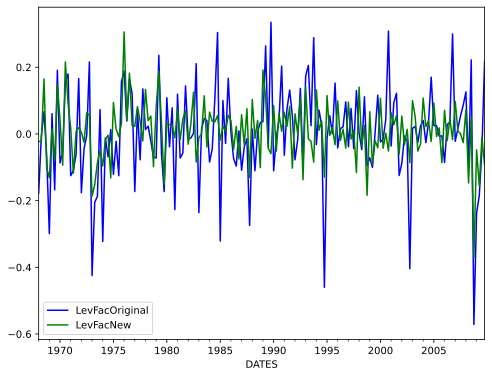

In [181]:
compare_lev_fac = compare_lev_fac.loc["1968Q1":]
compare_lev_fac.plot(color=['blue', 'green'], figsize=(8, 6))
plt.legend(['LevFacOriginal', 'LevFacNew'], loc='lower left')
plt.grid(False)
plt.savefig('compare_leverage_plot.png')